In [29]:
# only run this if you need to generate a new csv
# !python "pain/Data-Aggregation/write_csvs.py"

# Analysis for HealthKit Quantity

code for reading in and sorting data

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
#analysis on HK Quantity file
#device id will change when reinstalling app. In study, device id will stay the same, so i will treat it as such here.

df = pd.read_csv('healthQuanttest.csv',index_col=None, header=0) #change csv if you want to read another file
df = df.loc[df['type'] == 'HKQuantityTypeIdentifierHeartRate']
df = df.sort_values(by=['device_id']) #sort by user id

ids=df['device_id'].unique().tolist()

#mapping device id to all their data
id_data_map = {}
for id in ids:
    is_id = df['device_id']==id
    id_data_map[id] = df[is_id]
    
#further map device id to a map of their data split by days
id_data_byday_map = {}
for id in ids:
    day_data_map = {}
    id_data_byday_map[id] = day_data_map #initialize the week to data map for that id.
    alldata = id_data_map[id]
    #make map of all weeks data:
    times = alldata['timestamp'].tolist()
    days = pd.Series([x.split()[0] for x in times]).unique().tolist() 
    #annoying because list doesn't have unique function, have to convert back and forth
    for day in days:
        is_day = [day in x for x in alldata['timestamp'].tolist()]
        day_data = alldata[is_day]
        day_data = day_data.sort_values(by=['timestamp']) #sort by time 
        day_data.drop_duplicates(subset=['timestamp'], keep='first', inplace=True) #to avoid plotting duplicates
        day_data_map[day] = day_data
        
#plot given data ->need to fetch data 
def plot_data(data, val_type, bool_cum=False):
    vals = []
    time = []
    for int,row in data.iterrows():
        if row["type"] == val_type:
            vals += [row["value"]]
            time += [row["timestamp"]]
    if len(vals)!=0:
        spacing = 1
        if len(vals)>4:
            spacing = len(time)/4 #want 4 vals on x-axis bc too cluttered
        labels = time[::spacing]
        if bool_cum:
            cum = np.cumsum(vals)
            plt.plot(time, cum)
        else:
            plt.plot(time, vals)
        plt.xticks(labels, rotation=40)
        plt.show()
    else:
        print "no data for this value type"

#only for acceleration
def plot_accel_magnitude(id):
    day_data_map = id_data_byday_map[id]
    for day in day_data_map.keys():
        print "\t", day , ": "
        day_data = day_data_map[day]
        norms = []
        time = []
        for int,row in day_data.iterrows():
            x = row["double_values_0"]
            y = row["double_values_1"]
            z = row["double_values_2"]
            norm = math.sqrt(math.pow(x,2)+math.pow(y,2)+math.pow(z,2))
            norms.append(norm)
            time += [row["timestamp"]]
        spacing = 1
        if len(norms)>4:
            spacing = len(time)/4 #want 4 vals on x-axis bc too cluttered
        labels = time[::spacing]
        plt.plot(time, norms, "r")
        plt.xticks(labels, rotation=40)
        plt.show()
        
def plot_heart_rate_magnitude(id):
    day_data_map = id_data_byday_map[id]
    for day in day_data_map.keys():
        print "\t", day , ": "
        day_data = day_data_map[day]
        norms = []
        time = []
        for int,row in day_data.iterrows():
            heartrate = row["value"]
            norms.append(heartrate)
            time += [row["timestamp"]]
        spacing = 1
        if len(norms)>4:
            spacing = len(time)/4 #want 4 vals on x-axis bc too cluttered
        labels = time[::spacing]
        plt.plot(time, norms, "r")
        plt.xticks(labels, rotation=40)
        plt.show()

def plot_all_magnitude():
    for id in ids:
        print "plotting heart rate data on id ", id
        plot_heart_rate_magnitude(id)
        
#plot the data for one value-type for one user
def plot_id_type(id, val_type, bool_cum=False):
    print "printing data on id: ", id, ", type: ", val_type
    day_data_map = id_data_byday_map[id]
    for day in day_data_map.keys():
        print "\t", day , ": "
        data = day_data_map[day]
        plot_data(data, val_type, bool_cum)
            
# print out all data by day by id
def plot_allids_type(val_type, bool_cum=False):
    for id in ids:
        plot_id_type(id, val_type, bool_cum)

# list days collected for each id, as well as number of days, and range.
def getDaysInfo(id):
    days = []
    day_data_map = id_data_byday_map[id]
    for day in day_data_map.keys():
        days.append(day)
    days.sort()
    print "for id: ", id, "they have data for ", len(days), " days, ranging from ", days[0] , " to ", days[-1]
    
# list types of data collected for each id
def getDataTypes(data, print_sum = True):
    data_types = []
    types = data['type'].tolist()
    for t in types:  #remove duplicates
        if t not in data_types: 
            data_types.append(t)
    print "There are ", len(data_types), " data types. Data types collected are: \n", data_types
    return data_types
    
def getDataInfo(id):
    alldata = id_data_map[id]
    print "for id ", id , ": "
    data_types = getDataTypes(alldata)
    
def getIDInfo(print_ids = False):
    print "we have info on ", len(ids), " different device ids"
    if print_ids: print ids
    

we have info on  4  different device ids
['1acee1f8-2d24-4751-9751-18419f9c88cb', 'b64bc32d-7821-4103-9144-9b62f7f53612', 'b69c4e94-4b31-46d3-81de-81c5f2eb8ab5', 'f54016a6-11b2-496d-bd65-d55f144293ce']
plotting heart rate data on id  1acee1f8-2d24-4751-9751-18419f9c88cb
	2019-07-14 : 


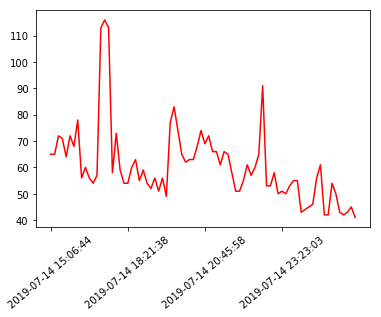

	2019-07-15 : 


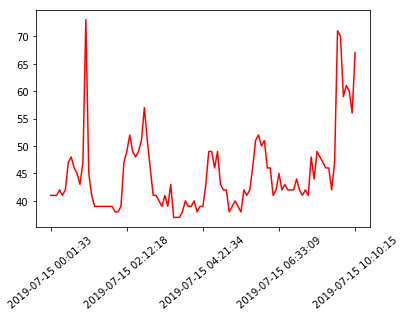

plotting heart rate data on id  b64bc32d-7821-4103-9144-9b62f7f53612
	2019-07-23 : 


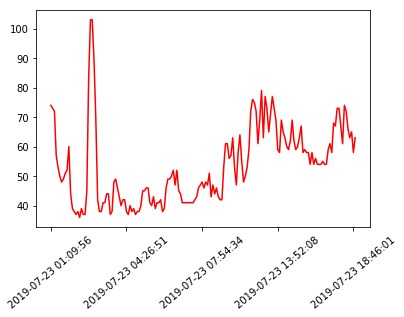

	2019-07-22 : 


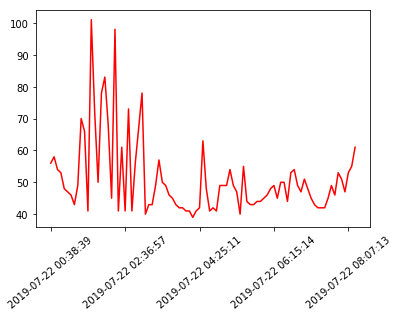

	2019-07-21 : 


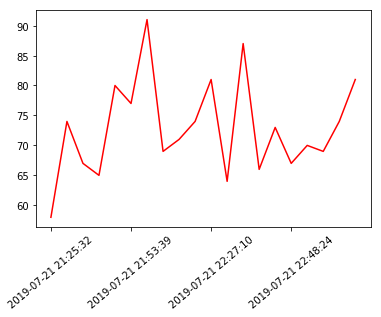

	2019-07-20 : 


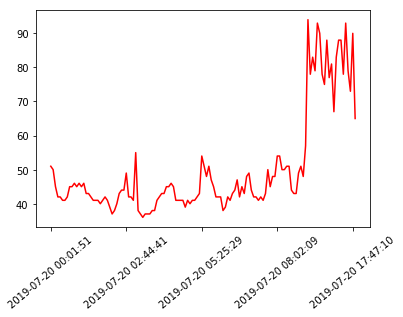

	2019-07-24 : 


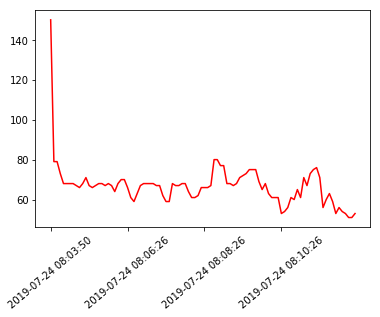

	2019-07-18 : 


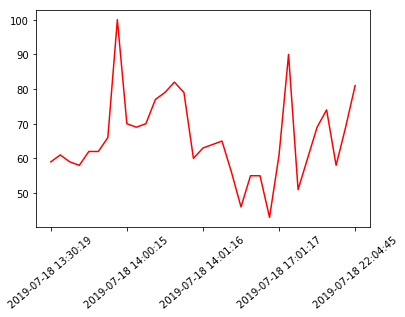

	2019-07-19 : 


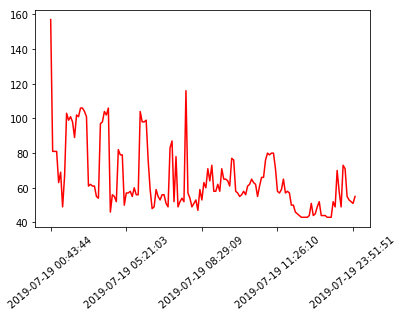

plotting heart rate data on id  b69c4e94-4b31-46d3-81de-81c5f2eb8ab5
	2019-07-12 : 


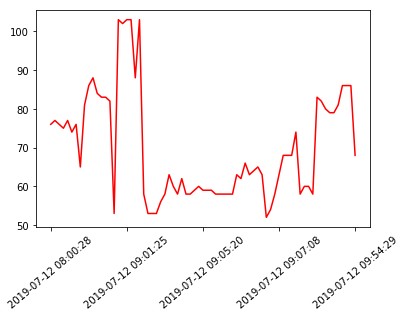

plotting heart rate data on id  f54016a6-11b2-496d-bd65-d55f144293ce
	2019-07-16 : 


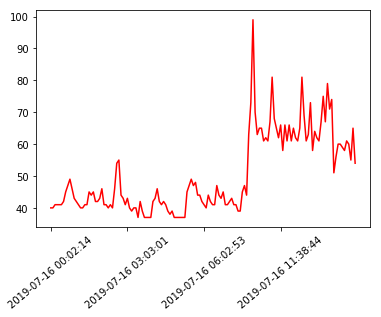

	2019-07-15 : 


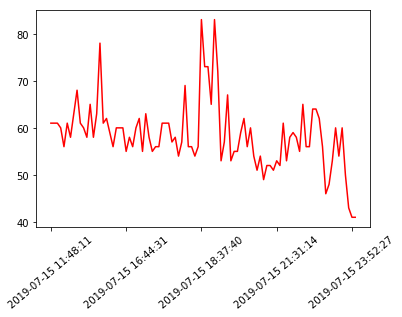

In [58]:
#plot_allids_type("HKQuantityTypeIdentifierDistanceWalkingRunning", True)
getIDInfo(True)
#getDataTypes(df)
# plot_id_type('b64bc32d-7821-4103-9144-9b62f7f53612', "HKQuantityTypeIdentifierHeartRate", False)
#getDaysInfo('da50db5c-a3b2-4712-b670-425aac5c8acb')
#getDataInfo('b64bc32d-7821-4103-9144-9b62f7f53612')
plot_all_magnitude()

#get devices of all users as well